In [19]:
library(dplyr)
library(Seurat)
library(ggplot2)
library(future)
library(Cairo)
library(DoubletFinder)
library(Matrix)


Attaching package: ‘Matrix’


The following object is masked from ‘package:spam’:

    det




In [2]:
# start multiprocess
plan("multiprocess")

ERROR: Error: No such strategy for futures: ‘multiprocess’


# before QC

Saving 6.67 x 6.67 in image


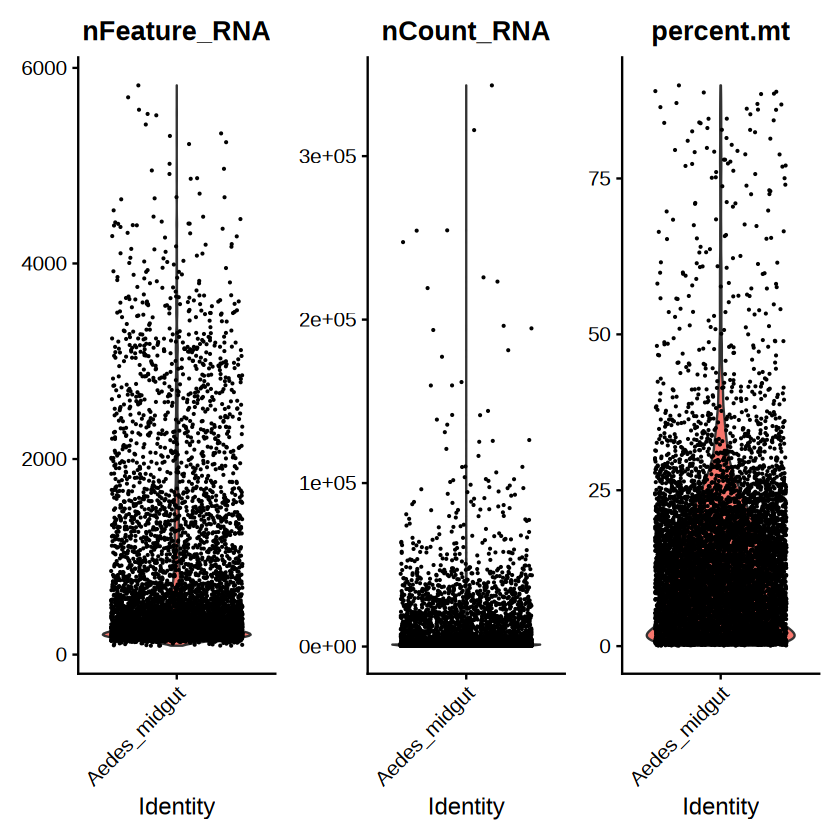

In [3]:
# before QC, "nFeature_RNA", "nCount_RNA", "percent.mt" should be plot to choose a reliable threshold

# path to 10x directory
ipath = '/public21/home/sc90258/huangying/analysis/1.Aedes_scRNA-Seq/20231016_Aeses_midgut.2sp/1.cellranger_count/map_2022_Aaedes_midgut/outs/filtered_feature_bc_matrix/'
# 'project' in 'CreateSeuratObject'
project = 'Aedes_midgut'
# args[3]: path to save seurat_obj (R virable)
opath_seurat_obj = '1.before_QC.seurat_obj.rds'
# args[4]: path to save violin plot (pdf)
opath_vlnplot = '1.before_QC.vlnplot.pdf'


library(Seurat)
library(ggplot2)
# read in data
data10x = Read10X(
    data.dir = ipath
)

# make Seurat object of RNA data
# create Seurat object
seurat_obj =  CreateSeuratObject(
    counts = data10x, 
    assay = "RNA",
    project = project, 
    min.cells = 3
)
# The [[ operator can add columns to object metadata. This is a great place to stash QC stats
seurat_obj[["percent.mt"]] <- PercentageFeatureSet(
    seurat_obj,
    pattern = "ND2|COX1|COX2|ATP8|ATP6|COX3|ND3|ND5|ND4|ND4L|ND6|CYTB|ND1AAEFMG.587|AAEFMG.3391|AAEFMG.3389|AAEFMG.17387|AAEFMG.17390|AAEFMG.21661|AAEFMG.21666|AAEFMG.21777|AAEFMG.21778|AAEFMG.23333|AAEFMG.23335|AAEFMG.23920|AAEFMG.22994|AAEFMG.22995|AAEFMG.22996|AAEFMG.22997|AAEFMG.22998|AAEFMG.22999|AAEFMG.23000|AAEFMG.23001|AAEFMG.23002|AAEFMG.23003|AAEFMG.23004|AAEFMG.23005|AAEFMG.23006|AAEFMG.23007|AAEFMG.23008|AAEFMG.23009|AAEFMG.23010|AAEFMG.23011|AAEFMG.23012|AAEFMG.23013|AAEFMG.23014|AAEFMG.23015|AAEFMG.23016|AAEFMG.23017|AAEFMG.23018|AAEFMG.23019|AAEFMG.23020|AAEFMG.23021|AAEFMG.23022|AAEFMG.23023|AAEFMG.23024|AAEFMG.23025|AAEFMG.23026|AAEFMG.23027|gene-CFI06_mgt22|gene-CFI06_mgt23",
    )
# save data
saveRDS(seurat_obj, file = opath_seurat_obj)

# Visualize QC metrics as a violin plot
p = VlnPlot(seurat_obj, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)
ggsave(opath_vlnplot)
p

# QC

Saving 6.67 x 6.67 in image


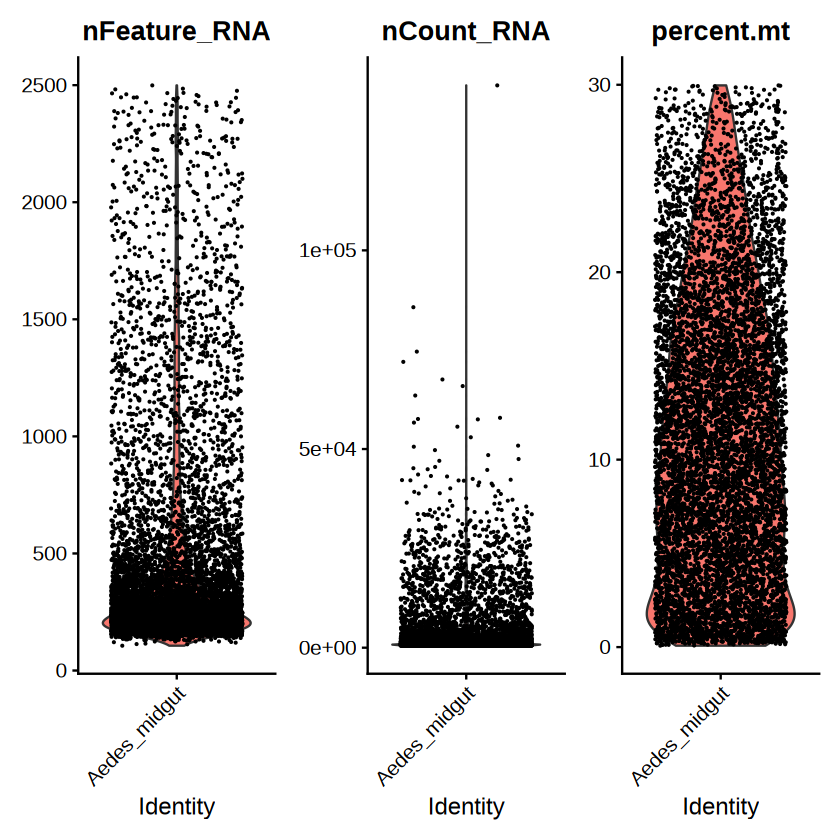

In [4]:
# set thresholds for maximum and minimum "nFeature_RNA", and maximum "percent.mt" and preprocessing data 

# args annotations
# path to seurat_obj RDS file
ipath_seurat_obj = './1.before_QC.seurat_obj.rds'
# minimum nFeature_RNA
min_nFeature_RNA = 100
# maximum nFeature_RNA
max_nFeature_RNA = 2500
# maximum percent.mt
max_percent.mt = 30
# path to save violin plot (pdf) of QC after filtering
opath_vlnplot = './2.QC.vlnplot.pdf'
# path to save scatter plot (pdf) of highly variable features
opath_dotplot_hvg = './2.QC.dotplot_hvg.pdf'
# path to save seurat_obj RDS file after QC and preprocessing
opath_seurat_obj = '2.QC.seurat_obj.rds'

# read in seurat_obj
seurat_obj = readRDS(ipath_seurat_obj)

# filter out cells
seurat_obj <- subset(
    seurat_obj, 
    subset = nFeature_RNA > as.numeric(min_nFeature_RNA) & nFeature_RNA < as.numeric(max_nFeature_RNA) & percent.mt < as.numeric(max_percent.mt),
)

# Visualize QC metrics as a violin plot after filter
p = VlnPlot(seurat_obj, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)
ggsave(opath_vlnplot, p)
p

In [5]:
# show genes and cells in seurat obj
seurat_obj

An object of class Seurat 
14937 features across 8055 samples within 1 assay 
Active assay: RNA (14937 features, 0 variable features)

In [6]:
# remove MT genes
seurat_obj_data <- GetAssayData(seurat_obj, assay = "RNA")
seurat_obj_data <- seurat_obj_data[
    -(which(rownames(seurat_obj_data) %in% c('ND2', 'COX1', 'COX2', 'ATP8', 'ATP6', 'COX3', 'ND3', 'ND5', 'ND4', 'ND4L', 'ND6', 'CYTB', 'ND1AAEFMG.587', 'AAEFMG.3391', 'AAEFMG.3389', 'AAEFMG.17387', 'AAEFMG.17390', 'AAEFMG.21661', 'AAEFMG.21666', 'AAEFMG.21777', 'AAEFMG.21778', 'AAEFMG.23333', 'AAEFMG.23335', 'AAEFMG.23920', 'AAEFMG.22994', 'AAEFMG.22995', 'AAEFMG.22996', 'AAEFMG.22997', 'AAEFMG.22998', 'AAEFMG.22999', 'AAEFMG.23000', 'AAEFMG.23001', 'AAEFMG.23002', 'AAEFMG.23003', 'AAEFMG.23004', 'AAEFMG.23005', 'AAEFMG.23006', 'AAEFMG.23007', 'AAEFMG.23008', 'AAEFMG.23009', 'AAEFMG.23010', 'AAEFMG.23011', 'AAEFMG.23012', 'AAEFMG.23013', 'AAEFMG.23014', 'AAEFMG.23015', 'AAEFMG.23016', 'AAEFMG.23017', 'AAEFMG.23018', 'AAEFMG.23019', 'AAEFMG.23020', 'AAEFMG.23021', 'AAEFMG.23022', 'AAEFMG.23023', 'AAEFMG.23024', 'AAEFMG.23025', 'AAEFMG.23026', 'AAEFMG.23027', 'gene-CFI06_mgt22', 'gene-CFI06_mgt23'))),]
seurat_obj <- subset(seurat_obj, features = rownames(seurat_obj_data))
seurat_obj

An object of class Seurat 
14912 features across 8055 samples within 1 assay 
Active assay: RNA (14912 features, 0 variable features)

When using repel, set xnudge and ynudge to 0 for optimal results

Saving 6.67 x 6.67 in image
Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Transformation introduced infinite values in continuous x-axis”
Centering and scaling data matrix



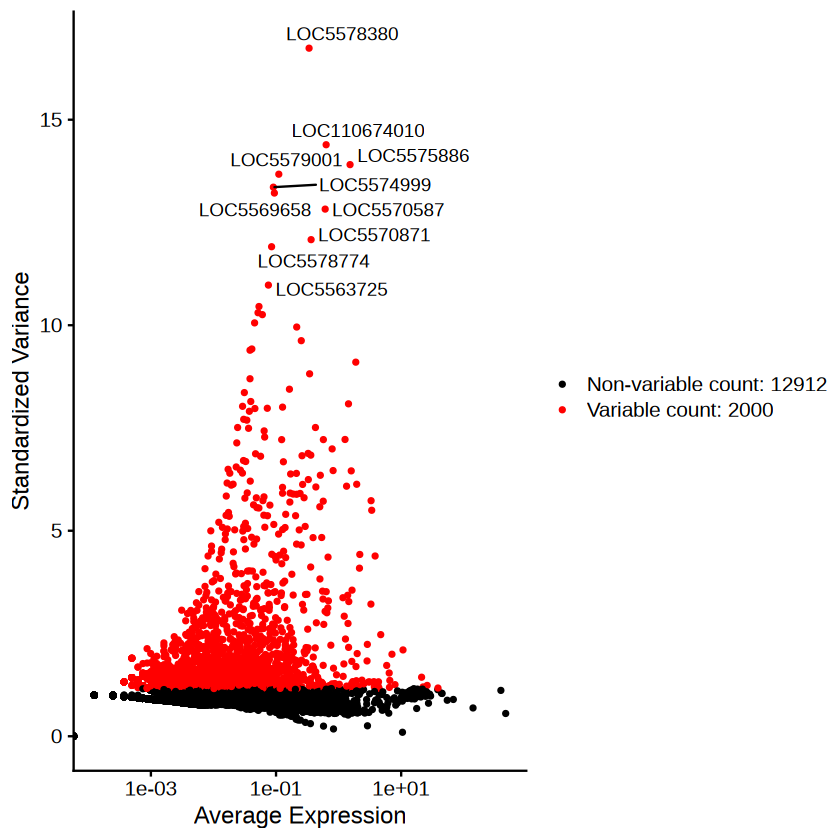

In [7]:
## preprocessing data 

# do normalization
seurat_obj <- NormalizeData(seurat_obj, normalization.method = "LogNormalize", scale.factor = 10000)

# feature selection
# Identification of highly variable features
seurat_obj <- FindVariableFeatures(seurat_obj, selection.method = "vst", nfeatures = 2000)
# Identify the 10 most highly variable genes
top10 <- head(VariableFeatures(seurat_obj), 10)
# plot variable features with and without labels
plot1 <- VariableFeaturePlot(seurat_obj)
plot2 <- LabelPoints(plot = plot1, points = top10, repel = TRUE)
# save plot2
ggsave(opath_dotplot_hvg, plot2)
plot2

# scaling data
all.genes <- rownames(seurat_obj)
seurat_obj <- ScaleData(seurat_obj, features = all.genes)

# save seurat_obj after filtering
saveRDS(seurat_obj, file = opath_seurat_obj)

# dimensional reduction

PC_ 1 
Positive:  LOC5564567, LOC5578306, LOC110674237, LOC5574655, LOC5578882, LOC5567964, AAEFMG.13274, LOC5571053, LOC5568046, LOC5573858 
	   LOC5571039, LOC5571828, LOC5574109, LOC5578590, LOC5579505, LOC5570622, AAEFMG.9018, LOC5578506, LOC5578455, LOC5573025 
	   LOC110678856, LOC5578507, LOC5570784, LOC5566780, LOC5574120, LOC5579954, LOC5569396, LOC5566457, LOC5566301, LOC5576124 
Negative:  LOC5566990, LOC5580231, LOC5574161, LOC5573031, LOC5575993, LOC5568444, LOC5577147, LOC5571832, LOC5580173, LOC5566332 
	   LOC5580168, LOC5568441, LOC5576127, LOC5574015, LOC5566330, LOC110680584, LOC5575995, LOC110676861, LOC5574604, LOC5568132 
	   LOC5574376, LOC5565155, AAEFMG.16204, LOC5569762, LOC5571120, LOC5575043, LOC110676862, LOC5573016, LOC23687432, LOC5567517 
PC_ 2 
Positive:  LOC5570883, LOC5564091, LOC5563695, LOC5576221, LOC5571086, LOC5569637, LOC5574649, LOC5576609, LOC5579101, LOC5571775 
	   LOC5568355, LOC5574966, LOC5565507, LOC5571084, LOC5564056, LOC110676293, LOC

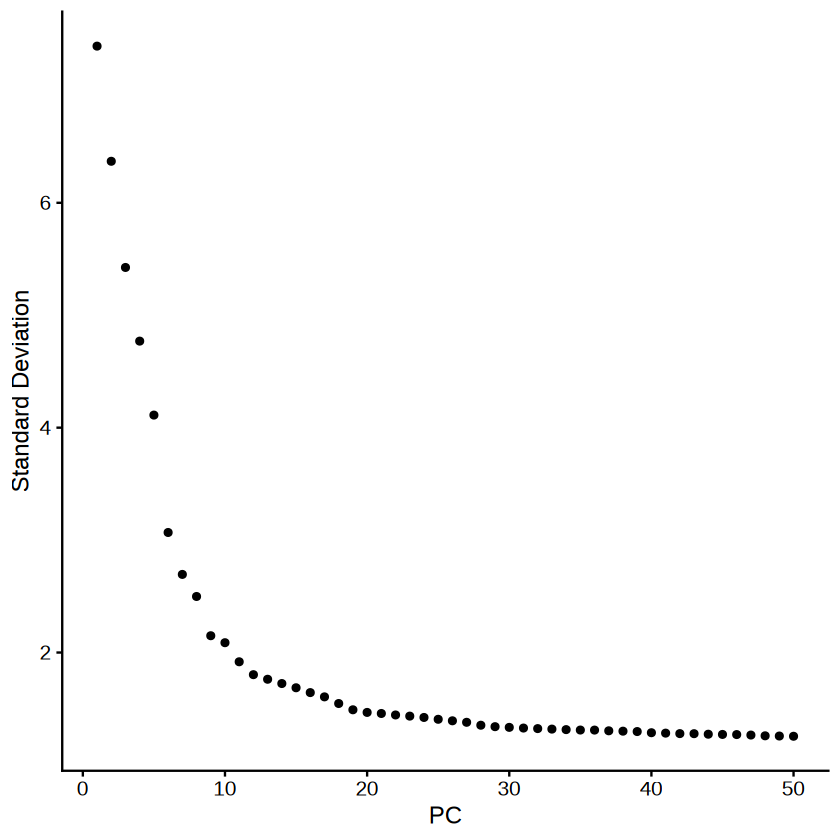

In [8]:
# dimensional reduction and cluster cells 

# args annotations
# path to seurat_obj RDS file
ipath_seurat_obj = './2.QC.seurat_obj.rds'
# number of PCs to plot
num_PCs = 60
# path to save DimHeatmap (pdf) of PCA
opath_dimheatmap = '3.PCA.DimHeatmap.1-20.pdf'
opath_dimheatmap = '3.PCA.DimHeatmap.21-40.pdf'
# path to save ElbowPlot (pdf) of PCA
opath_elbowPlot = '3.PCA.ElbowPlot.pdf'
# path to save seurat_obj
opath_seurat_obj = '3.PCA.seurat_obj.rds'

# read in seurat_obj
seurat_obj = readRDS(ipath_seurat_obj)
# PCA reduce dimension
seurat_obj <- RunPCA(seurat_obj, features = VariableFeatures(object = seurat_obj))
# plot DimHeatmap of PCA
# p1.1 = DimHeatmap(seurat_obj, dims = 1:30, balanced = TRUE)
# ggsave(opath_dimheatmap, p1.1)
# p1.1
# p1.2 = DimHeatmap(seurat_obj, dims = 31:num_PCs, balanced = TRUE)
# ggsave(opath_dimheatmap, p1.2)
# p1.2
# Plots the standard deviations of PCA
p2 = ElbowPlot(seurat_obj, ndims = num_PCs)
ggsave(opath_elbowPlot, p2)
p2
# save seurat_obj
saveRDS(seurat_obj, file = opath_seurat_obj)

# cluster

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 8055
Number of edges: 384625

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7439
Number of communities: 14
Elapsed time: 1 seconds


Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
09:28:13 UMAP embedding parameters a = 0.9922 b = 1.112

09:28:13 Read 8055 rows and found 40 numeric columns

09:28:13 Using Annoy for neighbor search, n_neighbors = 30

09:28:13 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

09:28:15 Writing NN index file to temp file /tmp/Rtmp9N5XtI/file1223a3c0b340f

09:28:15 Searching Annoy index using 1 thread, search_k = 3000

09:28:19 Annoy recall = 100%

09:28:19 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors 

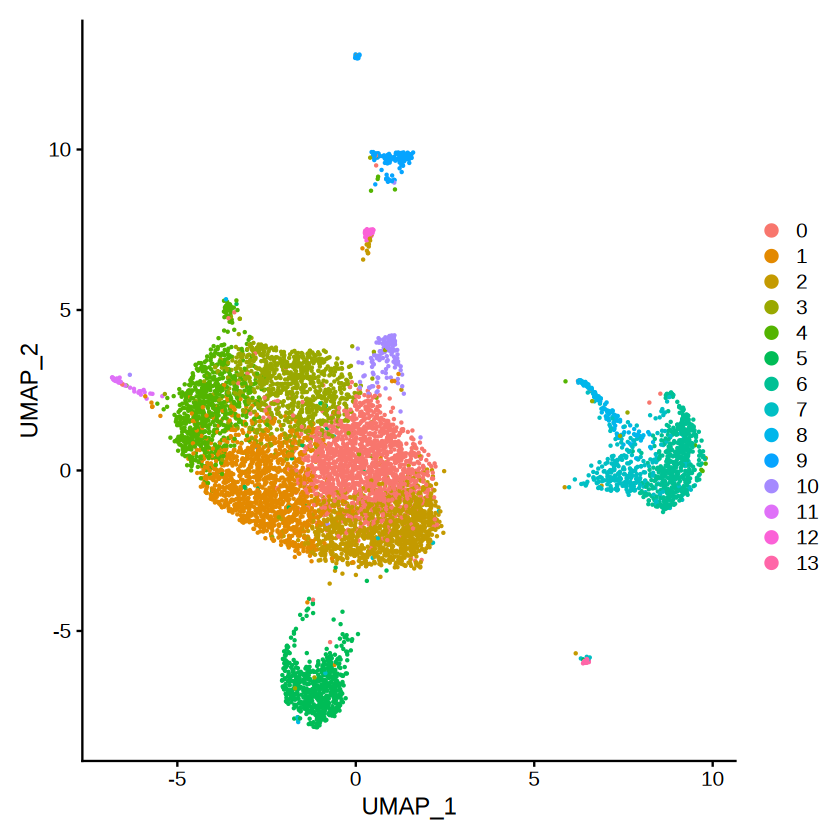

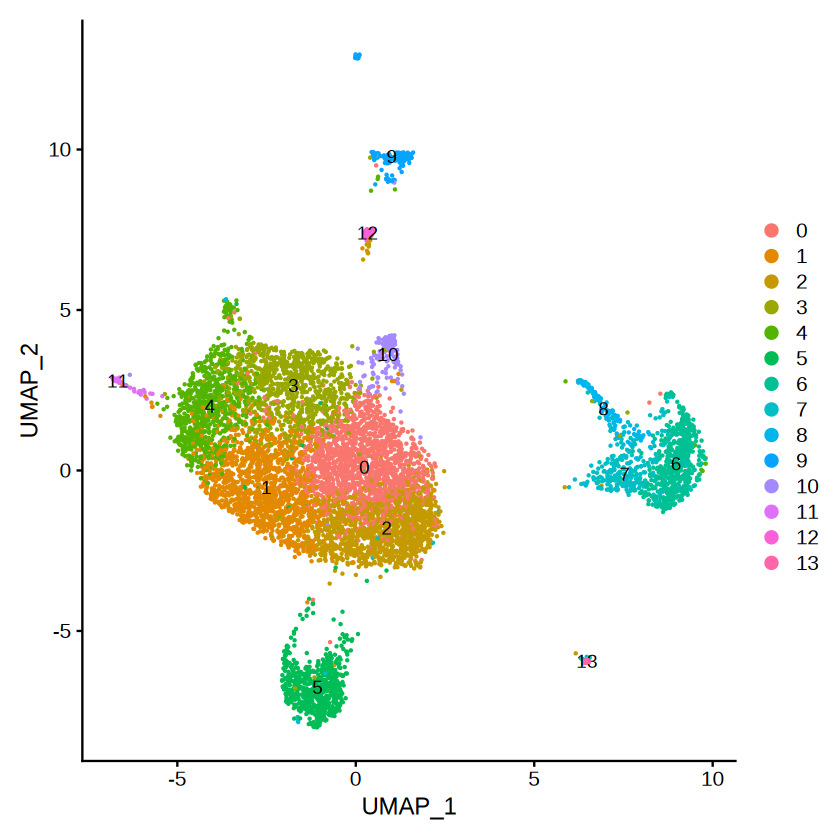

In [9]:
# dimensional reduction and cluster cells 

# args annotations
# path to seurat_obj RDS file
ipath_seurat_obj = './3.PCA.seurat_obj.rds'
# number of PCs to plot
num_PCs = 40
# resolution  between 0.4-1.2 typically returns good results 
#resolution = 0.5
# path to save DimHeatmap (pdf) of PCA
opath_DimPlot = '4.cluster.Dimplot.pdf'
# path to save DimHeatmap (pdf) of PCA
opath_DimPlot_labeled = '4.cluster.Dimplot.labeled.pdf'
# path to save seurat_obj
opath_seurat_obj = '4.cluster.seurat_obj.rds'

# read in seurat_obj
seurat_obj = readRDS(ipath_seurat_obj)
# construct a KNN graph based on PCA
seurat_obj <- FindNeighbors(seurat_obj, dims = 1:num_PCs)
# refine the edge weights between any two cells based on the shared overlap in their local neighborhoods (Jaccard similarity)
seurat_obj <- FindClusters(seurat_obj, resolution = 0.9)
# UMAP to cluster
seurat_obj <- RunUMAP(seurat_obj, dims = 1:num_PCs)
# plot
p = DimPlot(seurat_obj, reduction = "umap")
ggsave(opath_DimPlot, p)
p
# plot with label
p = DimPlot(seurat_obj, reduction = "umap", label = TRUE)
ggsave(opath_DimPlot_labeled, p)
p
# save seurat_obj
saveRDS(seurat_obj, file = opath_seurat_obj)

In [10]:
# args annotations
# path to seurat_obj RDS file
ipath_seurat_obj = './4.cluster.seurat_obj.rds'
# path to save seurat_obj
opath_seurat_obj = '5.marker.seurat_obj.rds'
# path to save marker genes
opath_marker_genes = '5.marker.genes.csv'

# read in seurat_obj
seurat_obj = readRDS(ipath_seurat_obj)
# find markers for every cluster compared to all remaining cells, report only the positive ones
seurat_obj.markers <- FindAllMarkers(seurat_obj, only.pos = TRUE, min.pct = 0.25, logfc.threshold = 0.25)
# save marker genes
write.csv(seurat_obj.markers, opath_marker_genes)
# save seurat_obj
saveRDS(seurat_obj, file = opath_seurat_obj)

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5

Calculating cluster 6

Calculating cluster 7

Calculating cluster 8

Calculating cluster 9

Calculating cluster 10

Calculating cluster 11

Calculating cluster 12

Calculating cluster 13



# plot DoHeatmap

png 
  2

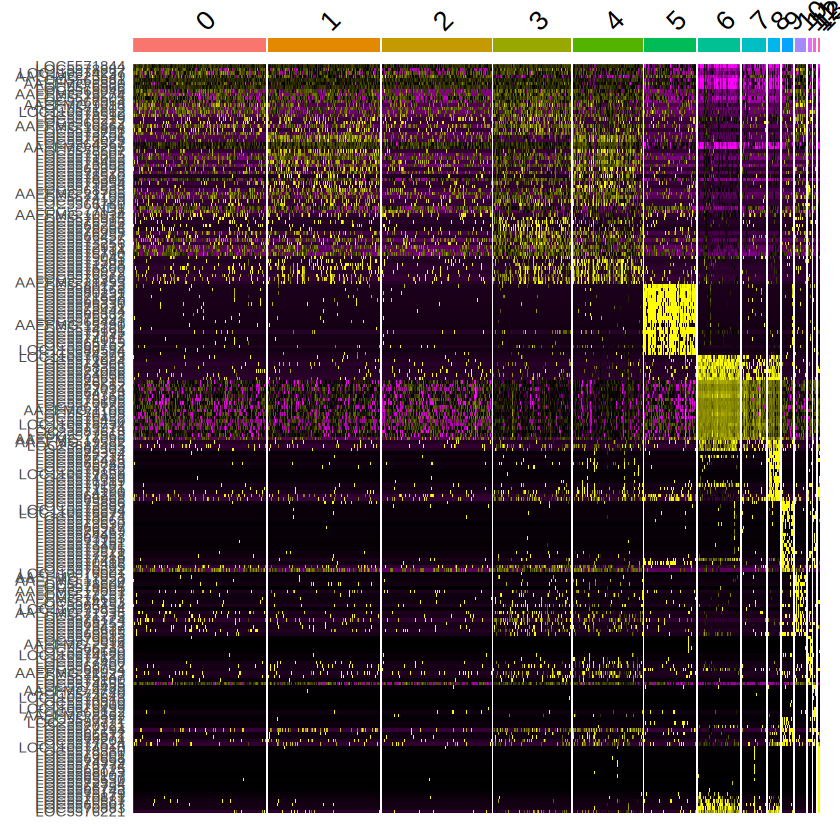

In [11]:
# path to read marker genes
ipath_marker_genes = '5.marker.genes.csv'
# path to read seurat_obj
ipath_seurat_obj = '5.marker.seurat_obj.rds'
# path to save DoHeatmap (pdf) of PCA
opath_DoPlot = '6.cluster.Doplot.pdf'

seurat_obj = readRDS(ipath_seurat_obj)
seurat_obj.markers = read.csv(ipath_marker_genes)

seurat_obj.markers %>%
    group_by(cluster) %>%
    top_n(n = 20, wt = avg_log2FC) -> topnG
p = DoHeatmap(seurat_obj, features = topnG$gene) + NoLegend()
cairo_pdf(opath_DoPlot, width=12, height=7)
plot(p)
dev.off()
p

# mark doublet

In [3]:
# path to read seurat_obj
ipath_seurat_obj = '5.marker.seurat_obj.rds'
seurat_obj = readRDS(ipath_seurat_obj)
# https://cloud.tencent.com/developer/article/1825672
nExp <- round(ncol(seurat_obj) * 0.04)  # expect 4% doublets
data.filt <- doubletFinder_v3(
    seurat_obj, 
    pN = 0.25, # https://cloud.tencent.com/developer/article/1825672
    pK = 0.09, 
    nExp = nExp, 
    PCs = 1:40)

Loading required package: fields

Loading required package: spam

Spam version 2.9-1 (2022-08-07) is loaded.
Type 'help( Spam)' or 'demo( spam)' for a short introduction 
and overview of this package.
Help for individual functions is also obtained by adding the
suffix '.spam' to the function name, e.g. 'help( chol.spam)'.


Attaching package: ‘spam’


The following objects are masked from ‘package:base’:

    backsolve, forwardsolve


Loading required package: viridisLite


Try help(fields) to get started.

Loading required package: KernSmooth

KernSmooth 2.23 loaded
Copyright M. P. Wand 1997-2009



[1] "Creating 2685 artificial doublets..."
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."
[1] "Finding variable genes..."
[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Computing pANN..."
[1] "Classifying doublets.."


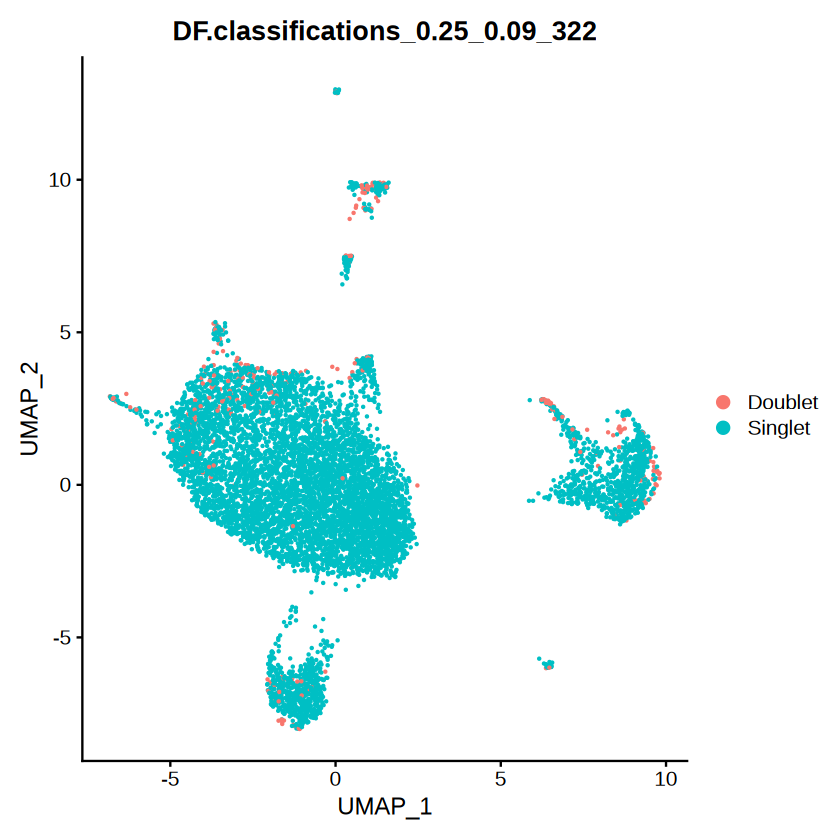

In [4]:
DF.name = colnames(data.filt@meta.data)[grepl("DF.classification", colnames(data.filt@meta.data))]

DimPlot(data.filt, group.by = DF.name)

In [6]:
# save seurat_obj
opath_seurat_obj = '7.mark_doublet.seurat_obj.rds'
saveRDS(data.filt, file = opath_seurat_obj)

# output

In [7]:
# path to read seurat_obj
ipath_seurat_obj = '7.mark_doublet.seurat_obj.rds'
seurat_obj = readRDS(ipath_seurat_obj)

In [9]:
# write out meta.data
opath_meta_data = '8.meta_data.csv'
write.csv(seurat_obj@meta.data, opath_meta_data)

In [10]:
# write out umap pos
opath_umap_pos = '8.umap_pos.csv'
write.csv(seurat_obj[["umap"]]@cell.embeddings, opath_umap_pos)

In [20]:
# write out reads count as a mtx
opath_rdc_mtx = '8.rd_count.mtx'
writeMM(Matrix(seurat_obj@assays$RNA@counts, sparse = T), opath_rdc_mtx)

NULL